In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [33]:
house=pd.read_csv('../trainn.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
house1=house[['MSSubClass','Neighborhood','Condition2','Exterior1st','OverallCond','KitchenQual','OverallQual',
               'ExterCond','Heating','SaleType','SalePrice']]
house1.MSSubClass = house.MSSubClass.astype('category')

In [44]:
tablo2=pd.concat([house1,pd.get_dummies(house1[['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','KitchenQual','SaleType','MSSubClass']])],axis=1).drop(columns=['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','SaleType','KitchenQual','MSSubClass'],axis=1)
y=tablo2['SalePrice']
X=tablo2.drop('SalePrice', axis = 1)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=465)
print('Eğitim kümesindeki gözlem sayısı : {}'.format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


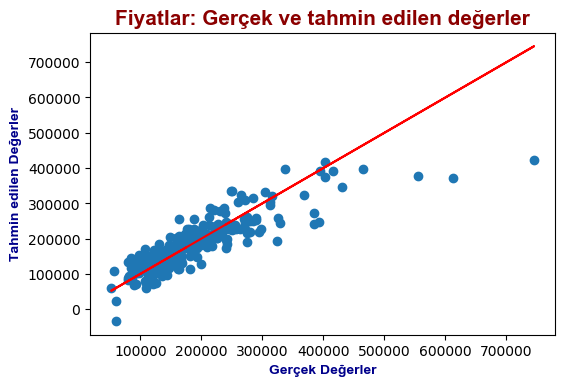

In [90]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)
X_test=sm.add_constant(X_test)
y_preds=model1.predict(X_test)
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [93]:
print("Eğitim kümesi R-Kare değeri       : {}".format(lrm.score(X_train,y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lrm.score(X_test,y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_preds) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.7950470737097659
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -2.262677908499229e+20
Ortalama Mutlak Hata (MAE)        : 28444.116814018973
Ortalama Kare Hata (MSE)          : 1860700320.3455634
Kök Ortalama Kare Hata (RMSE)     : 43135.83568618514
Ortalama Mutlak Yüzde Hata (MAPE) : 16.153066497218262


### Ridge

In [99]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge() 
ridgeregr.fit(X_train, y_train)

y_train_Rpreds = ridgeregr.predict(X_train)
y_test_Rpreds = ridgeregr.predict(X_test)

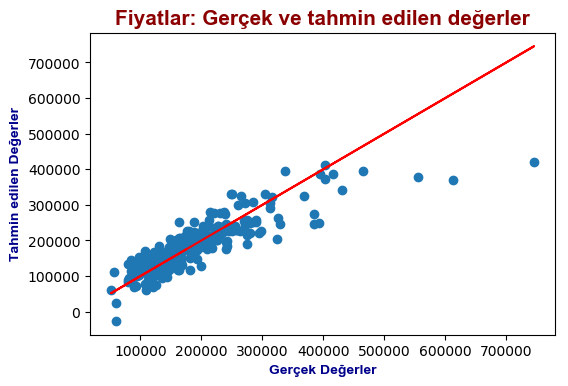

In [100]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_test_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [102]:
print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_Rpreds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_Rpreds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_Rpreds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_Rpreds) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.7940647798241169
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7431875607244111
Ortalama Mutlak Hata (MAE)        : 28444.116814018973
Ortalama Kare Hata (MSE)          : 1860700320.3455634
Kök Ortalama Kare Hata (RMSE)     : 43135.83568618514
Ortalama Mutlak Yüzde Hata (MAPE) : 16.153066497218262


### Lasso

In [62]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X_train, y_train)

y_egitim_Ltahmini = lassoregr.predict(X_train)
y_test_Ltahmini = lassoregr.predict(X_test)

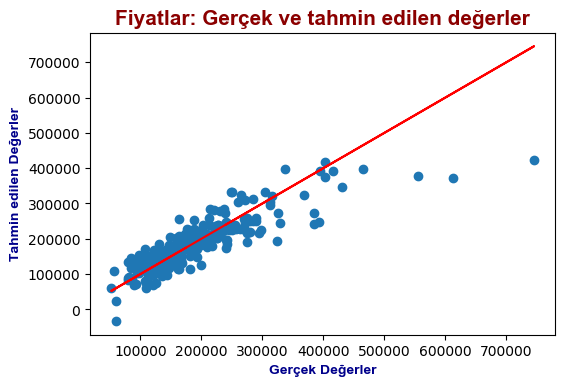

In [94]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_test_Ltahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [96]:
print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_Ltahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_Ltahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_Ltahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_Ltahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.7950496547553502
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7399716603720816
Ortalama Mutlak Hata (MAE)        : 28632.061824944707
Ortalama Kare Hata (MSE)          : 1884000697.9778066
Kök Ortalama Kare Hata (RMSE)     : 43405.076868700584
Ortalama Mutlak Yüzde Hata (MAPE) : 16.26778440753108


### ElasticNet

In [78]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 
elasticregr.fit(X_train, y_train)

y_egitim_Etahmini = elasticregr.predict(X_train)
y_test_Etahmini = elasticregr.predict(X_test)

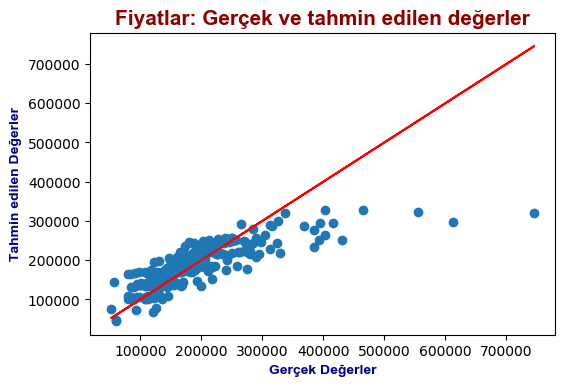

In [79]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_test_Etahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [97]:
print("Eğitim kümesi R-Kare değeri       : {}".format(elasticregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elasticregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_Etahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_Etahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_Etahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_Etahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.6471200609176705
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.6262679766117347
Ortalama Mutlak Hata (MAE)        : 31684.791226761008
Ortalama Kare Hata (MSE)          : 2707825592.8860755
Kök Ortalama Kare Hata (RMSE)     : 52036.77154557223
Ortalama Mutlak Yüzde Hata (MAPE) : 17.630149712424583
